#  <span style="color:BLUE">IMPORTACIÓN DE LIBRERIAS</span>

In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Conv3D,MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger
import matplotlib.pyplot as plt
import numpy as np

#  <span style="color:BLUE">CARGA DEL DATASET (50000K DE IMÁGENES) Y NORMALIZACIÓN (MIN_MAX)</span>

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

x_train =normalize(x_train) 
x_test =normalize(x_test)

#  <span style="color:BLUE">CREACIÓN DEL MODELO</span>

In [3]:
# except Exception as e:
model = Sequential()

#Layer 1 
model.add( Conv2D(48, kernel_size=(3,3),strides=(1,1), activation='relu', padding='same', input_shape=x_train.shape[1:] ) )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 2
model.add( Conv2D(96, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 3
model.add( Conv2D(192, kernel_size=(3,3), activation='relu', padding='same') )


#Layer 4
model.add( Conv2D(192, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

#Layer 5
model.add( Conv2D(256, kernel_size=(3,3), activation='relu', padding='same') )
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)) )

model.add(Flatten())

#Layer 6
model.add(Dense(512, activation='tanh'))

#Layer 7 
model.add(Dense(256, activation='tanh'))

#Prediction
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#  <span style="color:BLUE">ENTRENAMIENTO DEL MODELO</span>

In [4]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 132s 3ms/sample - loss: 1.5497 - accuracy: 0.4243 - val_loss: 1.1427 - val_accuracy: 0.5879
Epoch 2/10
50000/50000 [==============================] - 128s 3ms/sample - loss: 1.0368 - accuracy: 0.6291 - val_loss: 0.9627 - val_accuracy: 0.6616
Epoch 3/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.8149 - accuracy: 0.7121 - val_loss: 0.8399 - val_accuracy: 0.7114
Epoch 4/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.6679 - accuracy: 0.7629 - val_loss: 0.7925 - val_accuracy: 0.7329
Epoch 5/10
50000/50000 [==============================] - 117s 2ms/sample - loss: 0.5528 - accuracy: 0.8061 - val_loss: 0.7442 - val_accuracy: 0.7485
Epoch 6/10
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.4575 - accuracy: 0.8394 - val_loss: 0.7578 - val_accuracy: 0.7509
Epoch 7/10
50000/50000 [==========================

#  <span style="color:BLUE">RESULTADOS DE LA EVALUACIÓN</span>

In [5]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 7s 746us/sample - loss: 1.0123 - accuracy: 0.7402
Test loss 1.0123, accuracy 74.02%


#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC</span>

[0.5879, 0.6616, 0.7114, 0.7329, 0.7485, 0.7509, 0.7502, 0.7569, 0.7232, 0.7402]


Text(0, 0.5, 'acc')

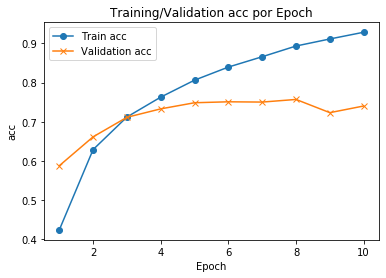

In [6]:
f, ax = plt.subplots()
print(history.history['val_accuracy'])
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

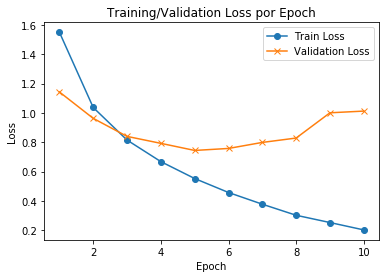

In [7]:
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')